Task 1: Regression Task
To predict the percentage of marks that a student is expected is score based on the number of study hours. 

In [7]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Importing CSV dataset
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("CSV file data read successfully. Below displayed is the data provided.")
student_data.head(5)

CSV file data read successfully. Below displayed is the data provided.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#Describes the datatypes of the columns of the dataset
student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
#Describes the statiscal details of the dataset such as count,min,max etc
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#Defines info about the dataset including no. of entries, columns and its datatypes
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


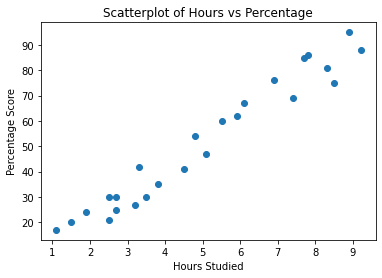

In [12]:
# Plotting the scores against hours studied
x_axis = student_data["Hours"]
y_axis = student_data["Scores"]
plt.scatter(x_axis,y_axis)
plt.title('Scatterplot of Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [13]:
#Finds the correlation between hours and scores
student_data[["Hours","Scores"]].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
#Defining the predictor and target variables
X = student_data['Hours'].values.reshape(-1,1)
y = student_data['Scores'].values.reshape(-1,1)

In [15]:
#Defining train and test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [16]:
#Fitting the model
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() #creating a linear regression constructor 
lm.fit(X_train, y_train) 
print("Training complete.")

Training complete.


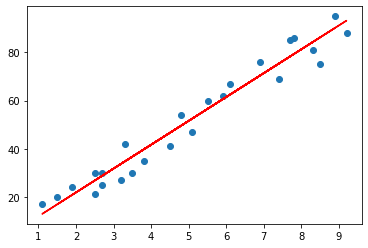

In [17]:
#Scatterplot
line = lm.coef_*X+lm.intercept_
plt.scatter(X, y)
plt.plot(X, line,color="r");
plt.show()

In [18]:
#Predicts the testdata
print(X_test) 
y_pred = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
#Intercept and slope values
print("Intercept value is:", format(lm.intercept_))
print("Slope value is:", format(lm.coef_))

Intercept value is: [2.01816004]
Slope value is: [[9.91065648]]


In [20]:
#List of actual and predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

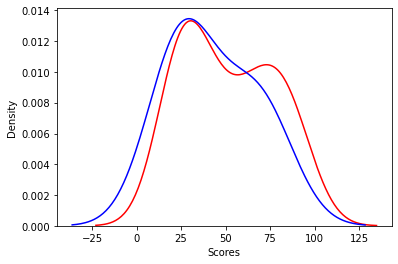

In [21]:
#Distribution plot
axl = sns.distplot(student_data['Scores'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Value", ax=axl)

In [22]:
#R-squared value
lm.fit(X,y)
print("R-squared error:",lm.score(X,y))

R-squared error: 0.9529481969048356


In [23]:
#Mean-squared error
from sklearn import metrics
print("Mean absolute error:", metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.18385989900298


In [ ]:
import ipywidgets as widgets
a = widgets.FloatText(value=1.0,min=0.0,max=40.0,step=0.1,description='Hours studies')
b = widgets.FloatSlider(value=1.0,min=0.0,max=40.0,step=0.1,description='Hours studied')
display(a,b)
mylink = widgets.jslink((a, 'value'), (b, 'value'))

In [24]:
#Predicting the marks scored if the number of hours studied is 8.5
own_pred = lm.predict(np.array(8.5).reshape(-1,1))
print("No of Hours = {}".format(8.5))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8.5
Predicted Score = [85.57800223]
